### Step1

In [3]:
import pandas as pd
df=pd.read_csv('train_loan.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### Step2

In [9]:
df['Dependents'].astype('str')

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [10]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Credit_History']
cont_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Property_Area', 'Loan_Status']

In [11]:
df[cat_cols]=df[cat_cols].fillna(df.mode().iloc[0])

In [12]:
df[cont_cols]=df[cont_cols].fillna(df.median().iloc[0])

C:\Users\8mpra\AppData\Local\Temp\ipykernel_44376\837372133.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[cont_cols]=df[cont_cols].fillna(df.median().iloc[0])


In [13]:
train=df.drop(['Loan_ID'],axis=1)

In [14]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,3812.5,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Step3

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

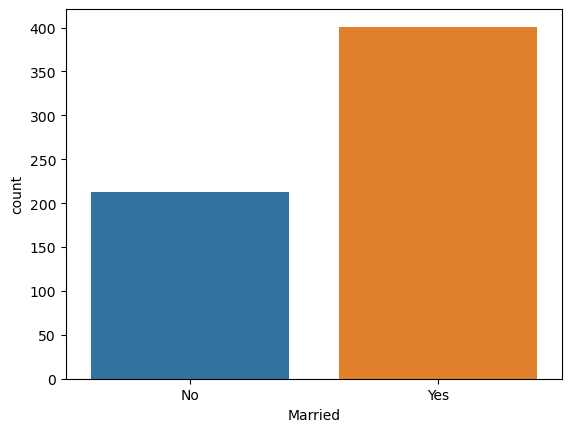

In [16]:
sns.countplot(x ='Married', data = train)
plt.show()

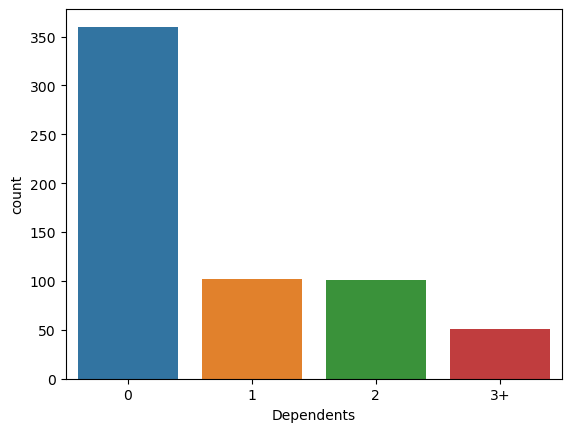

In [17]:
sns.countplot(x ='Dependents', data = train)
plt.show()

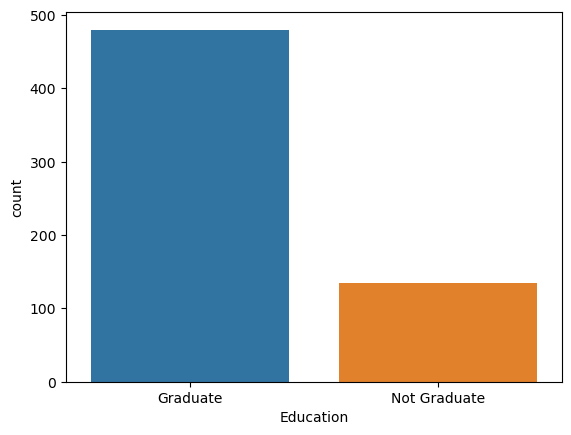

In [18]:
sns.countplot(x ='Education', data = train)
plt.show()

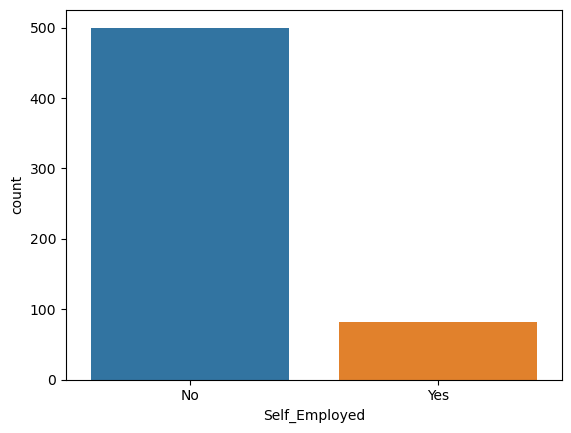

In [19]:
sns.countplot(x ='Self_Employed', data = train)
plt.show()

### Step4

In [20]:
X = train.drop(['Loan_Status'],axis=1)
y = train['Loan_Status']

### Step5

In [21]:
X = pd.get_dummies(X)

### Step6

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.59852531, -0.60393266, -0.06900751, ..., -0.63101212,
         1.26446434, -0.70250017],
       [-0.19469522, -0.60393266, -0.21379962, ..., -0.63101212,
         1.26446434, -0.70250017],
       [-0.21846026, -0.05485482, -0.17243045, ...,  1.58475562,
        -0.79084872, -0.70250017],
       ...,
       [-0.38481554, -0.60393266, -0.35268185, ..., -0.63101212,
         1.26446434, -0.70250017],
       [-0.1797382 , -0.60393266, -0.21823203, ..., -0.63101212,
         1.26446434, -0.70250017],
       [-0.28776111, -0.60393266, -0.23891662, ..., -0.63101212,
        -0.79084872,  1.42348719]])

In [24]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29, 25],
       [52, 48]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.36      0.54      0.43        54
           Y       0.66      0.48      0.55       100

    accuracy                           0.50       154
   macro avg       0.51      0.51      0.49       154
weighted avg       0.55      0.50      0.51       154



### step7

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y1_pred = model.predict(X_test)

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
accuracy_score(y_test, y1_pred)

0.7727272727272727

In [30]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=1000)
sgdc.fit(X_train, y_train)
y2_pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, y2_pred)

0.7727272727272727

### Step8

In [39]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
model1.fit(X_train, y_train)
y3_pred = model1.predict(X_test)

In [40]:
accuracy_score(y_test, y3_pred)

0.7597402597402597

In [32]:
model2=SVC(kernel='poly', C=1.0)
model2.fit(X_train, y_train)
y4_pred = model2.predict(X_test)

In [33]:
accuracy_score(y_test, y4_pred)

0.6558441558441559

In [34]:
model3=SVC(kernel='rbf', gamma=0.7, C=1.0)
model3.fit(X_train, y_train)
y5_pred = model3.predict(X_test)

In [35]:
accuracy_score(y_test, y5_pred)

0.6493506493506493

In [36]:
model4=SVC(kernel ='sigmoid')
model4.fit(X_train, y_train)
y6_pred = model4.predict(X_test)
accuracy_score(y_test, y6_pred)

0.6103896103896104

In [37]:
accuracy_score(y_test, y6_pred)

0.6103896103896104